In [1]:
#This run has altered shape parameter(15 instead of 2), 990 time steps

In [2]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import scipy.special as sps 
import math
from itertools import combinations
import itertools

<function matplotlib.pyplot.show(close=None, block=None)>

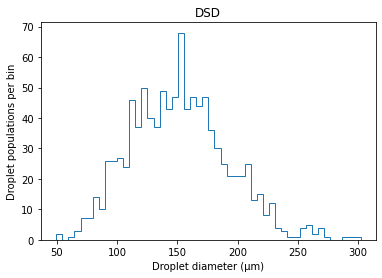

In [3]:
N=1000;
shape=15.;
scale = 1.;
numbins1=50;
numbins3=800;
D = (10**(-5))*np.random.gamma(shape, scale, N)

counts1a, bins1a = np.histogram(D,bins=numbins1)
plt.stairs(counts1a, bins1a*(10**6))
plt.xlabel('Droplet diameter (\u03bcm)')
plt.ylabel('Droplet populations per bin')
plt.title('DSD')
plt.show
#initial DSD

<function matplotlib.pyplot.show(close=None, block=None)>

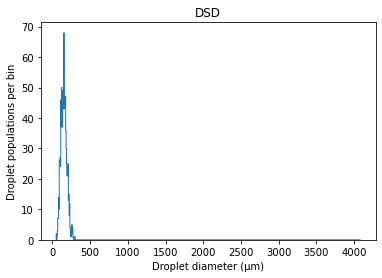

In [4]:
binsize_1=bins1a[1]-bins1a[0]
bins1_ext=np.arange(bins1a[0],bins1a[0]+binsize_1*(numbins3+1),binsize_1)
counts1_ext=np.concatenate((counts1a,np.zeros(numbins3-numbins1)),axis=None)

plt.stairs(counts1_ext, bins1_ext*(10**6))
plt.xlabel('Droplet diameter (\u03bcm)')
plt.ylabel('Droplet populations per bin')
plt.title('DSD')
plt.show
#DSD

In [5]:
bins1_av_dia=(bins1a[0:-1]+bins1a[1:])/2#bins for size histogram
bins1_ext_av_dia=(bins1_ext[0:-1]+bins1_ext[1:])/2#bins for size histogram
total_droplet_population=np.sum(counts1a)
total_droplet_population

1000

<function matplotlib.pyplot.show(close=None, block=None)>

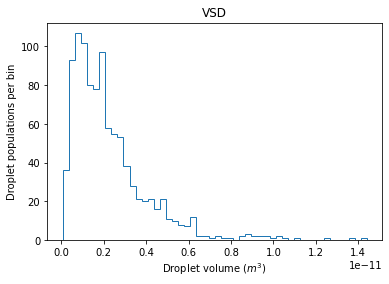

In [6]:
V=(np.pi/6)*(D**3)
counts2a, bins2a = np.histogram(V,bins=numbins1)
plt.stairs(counts2a, bins2a)
plt.xlabel('Droplet volume ($m^{3}$)')
plt.ylabel('Droplet populations per bin')
plt.title('VSD')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

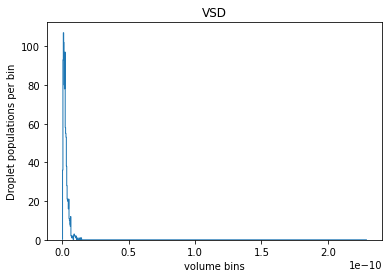

In [7]:
binsize_2=bins2a[1]-bins2a[0]
bins2_ext=np.arange(bins2a[0],bins2a[0]+binsize_2*(numbins3+1),binsize_2)
counts2_ext=np.concatenate((counts2a,np.zeros(numbins3-numbins1)),axis=None)

bins2_av_volms=(bins2a[0:-1]+bins2a[1:])/2#bins for volm histogram
bins2_ext_av_volms=(bins2_ext[0:-1]+bins2_ext[1:])/2#bins for volm histogram

plt.stairs(counts2_ext, bins2_ext)
plt.xlabel('volume bins')
plt.ylabel('Droplet populations per bin')
plt.title('VSD')
plt.show
#DSD

In [8]:
x = np.arange(numbins3)
combs=[p for p in itertools.product(x, repeat=2)]
combs1=np.array(combs)
sa1,sb1=np.shape(combs1)
combs3=combs1+np.ones((sa1,sb1))
#combs3

for i in range(sa1):
    if (combs1[i,0]+combs1[i,1]) > (numbins3-1):
        combs1[i,:]=-999
#combs1          
combs2 = np.delete(combs1, np.where(((combs1[:, 0]==-999))), axis=0)


sa2,sb2=np.shape(combs2)


for i in range(sa1):
    if (combs3[i,0]+combs3[i,1]) > numbins3:
        combs3[i,:]=-999
          
combs4 = np.delete(combs3, np.where(((combs3[:, 0]==-999))), axis=0)

sa4,sb4 = np.shape(combs4)

for i in range(sa4):
    for j in range(sb4):
        combs4[i,j]=int(combs4[i,j])
#combs2
#combs4

In [9]:
#fallspeed for cloud droplets, diameter must be given in m
def vt(arg1):#arg 1 is radius
    #vterm = ((arg1*100)**0.5)*20.1;#raindrop fall speed
    vterm = (1.19*(10**8))*(arg1)**2; #cloud droplet fall speed
    return vterm

#collision efficiency
def E_coll(arg1,arg2):#arg 1 and arg 2 are droplet radii
    k1=4.5*(10**4)*(10**4)#m-2
    k2=3*(10**(-4))*0.01#m
    r1=np.maximum(arg1,arg2)#m
    r2=np.minimum(arg1,arg2)#m
    ecoll=k1*(r1**2)*(1-k2)/r2
    return ecoll

#collision Kernel
def Kij(arg1,arg2):#arg 1 and arg 2 are droplet radii
    K = E_coll(arg1,arg2)*(np.pi/4)*((arg1+arg2)**2)*np.abs((vt(arg1)-vt(arg2)));
    return K

# radius from volm
def Rad(arg1):#arg 1 is volume
    rad=(arg1*3/(4*np.pi))**(1/3)
    return rad



In [10]:
# Fix random seed for repeatability
np.random.seed(123)

# Sample the period until the next event
def period_sampling(propensities):

    net_propensity = np.sum(propensities)

    return np.random.exponential(scale = 1 / net_propensity)

# Sample the reaction
def reaction_sampling(propensities):

    net_propensity = np.sum(propensities)
    
    normalized_propensity = [(propensity/net_propensity) for propensity in propensities]
        
    return np.random.choice(len(normalized_propensity), p = normalized_propensity)



K_combs=np.zeros((sa4,1))
# Define the reaction rates
for i in range(sa4):
    K_combs[i,0]=Kij(Rad(bins2_ext_av_volms[int(combs4[i,0])]),Rad(bins2_ext_av_volms[int(combs4[i,1])]));
   


In [11]:
# Define the initial populations and initial propensities
populations = counts2_ext
propensities=np.zeros((sa4))

for i in range(sa4):
    propensities[i] = K_combs[i,0]*populations[int(combs4[i,0])-1]*populations[int(combs4[i,1])-1]


In [12]:
zeta2=np.zeros((len(propensities),len(populations)))

for i in range(len(propensities)):
    zeta2[i,int(combs4[i,0]-1)]=zeta2[i,int(combs4[i,0]-1)]-1;
    zeta2[i,int(combs4[i,1]-1)]=zeta2[i,int(combs4[i,1]-1)]-1;
    zeta2[i,int((combs4[i,0]+combs4[i,1])-1)]=zeta2[i,int((combs4[i,0]+combs4[i,1])-1)]+1;

In [13]:
#define initial conditions of timestep and number of time step
dt=1;
nt=1;

#define total time steps
time_steps=4000

steps = time_steps    # Number of reactions per trajectory
cycles = 1  # Number of trajectories iterated over

In [14]:
# Implement the Gillespie algorithm
populations_series=np.zeros((time_steps,len(populations),cycles))
time_en=np.zeros((time_steps,cycles))
populations_series[0,:,:]=np.resize(np.dstack([populations]*cycles),(len(populations),cycles))
c=0
#for c in range(1,cycles):
time = [0]
for i in range(1,time_steps):
    # Define the initial time
    # Sample the time
    t = time[-1]
    time_period = period_sampling(propensities)
    print(i)
    print(t)
    # Update the time
    time.append(t + time_period)
    time_en[i,c]=t + time_period
    # Sample the reaction
    g = reaction_sampling(propensities)
    # Update the population and propensities using the stoichometric array
    populations_series[i,:,c] = populations_series[i-1,:,c]+zeta2[g,:]#i is time-step; j is bin; g is reaction
    for k in range(sa4):
        propensities[k] = K_combs[k,0]*populations_series[i,int(combs4[k,0])-1,c]*populations_series[i,int(combs4[k,1])-1,c]

time1=time[1:]

1
0
2
0.0016848468841221635
3
0.0020487785651689067
4
0.0038466771345016418
5
0.009407366426115529
6
0.010331189741782884
7
0.010923021242769455
8
0.011723471952557381
9
0.012428291296492438
10
0.012707551585952622
11
0.01375855018092981
12
0.015137016528735645
13
0.01688507054945671
14
0.0186225010244194
15
0.019228746080288926
16
0.019698224395696
17
0.01982853540399833
18
0.02058964745178832
19
0.02133007106649845
20
0.0220698091373258
21
0.02587628056168599
22
0.027167452498695503
23
0.02767114898616013
24
0.03031206429403398
25
0.031177275120891662
26
0.032132227736766036
27
0.032299928810033816
28
0.03350582557407392
29
0.03404753732984506
30
0.03474272379605346
31
0.03743129002654262
32
0.038851452655085834
33
0.04011232699432416
34
0.04247561893878537
35
0.04432280033277207
36
0.044599118053708184
37
0.04472789809471768
38
0.045991237083804704
39
0.04601199416321853
40
0.04704858961323335
41
0.047260312244833035
42
0.047749342558847704
43
0.04877949947023418
44
0.05207562701837

352
0.27086088719211454
353
0.2712130197356442
354
0.2717865440579424
355
0.27214494893255287
356
0.27232387070306857
357
0.2725548422932323
358
0.272837074271469
359
0.27342043264943505
360
0.27343179465782735
361
0.2734871455505073
362
0.2736906270426012
363
0.2741874455179147
364
0.27446178491020917
365
0.2745498459575698
366
0.27463046569674865
367
0.274811286139808
368
0.27488070452910324
369
0.2750849009035357
370
0.2754232431548627
371
0.27549535243944384
372
0.2758550989232961
373
0.2760259169446877
374
0.2763713375873981
375
0.276931016477195
376
0.2776278154163322
377
0.2777156163492293
378
0.27791907761957163
379
0.27816166196365355
380
0.278235945271218
381
0.2787748227591344
382
0.2791158907436906
383
0.2796041387136155
384
0.2804377174639489
385
0.28055106531482454
386
0.2806870321436819
387
0.28231123689371684
388
0.28246113767967435
389
0.2834913231504599
390
0.2836696223362642
391
0.28621898926667866
392
0.28751706764702295
393
0.28758585408233717
394
0.287813074611169

703
0.5135804219323815
704
0.5136451996958934
705
0.5144357019434858
706
0.5148484372014439
707
0.5169145434113787
708
0.5200258418834299
709
0.5211721166332423
710
0.5217113348306497
711
0.5219104923434266
712
0.5237652649249994
713
0.5239266405699651
714
0.5254259846118633
715
0.5272593173077949
716
0.5280685881489035
717
0.5281655453506952
718
0.5281695872164889
719
0.5286070526356127
720
0.5292610684180314
721
0.5293634672685883
722
0.5303791694557152
723
0.5307698178945598
724
0.5311068284814084
725
0.5326351161646515
726
0.5338159853682235
727
0.5338722173245645
728
0.5351982159764732
729
0.5362636446120874
730
0.5376107861836944
731
0.5377762341687993
732
0.5389975551814035
733
0.5390420301520432
734
0.5398054121411323
735
0.5403338468265491
736
0.5405303492587669
737
0.5408141597922865
738
0.5412825005342988
739
0.5419646023655802
740
0.5424273732120173
741
0.5430851260261618
742
0.5437191080367949
743
0.5443838435397743
744
0.5444715274566378
745
0.5446539606419766
746
0.54679

/var/folders/gn/f_5_34xj7qdbfw6h3f12qc080000gn/T/ipykernel_59774/402368653.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  return np.random.exponential(scale = 1 / net_propensity)
/var/folders/gn/f_5_34xj7qdbfw6h3f12qc080000gn/T/ipykernel_59774/402368653.py:16: RuntimeWarning: invalid value encountered in double_scalars
  normalized_propensity = [(propensity/net_propensity) for propensity in propensities]


990
2.5858175866543944


ValueError: probabilities contain NaN

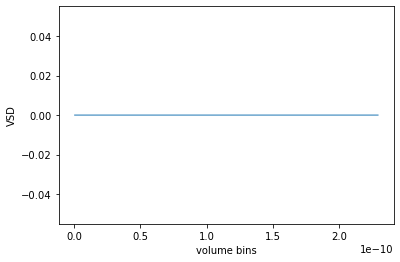

In [15]:
plt.stairs(populations_series[990,:,0], bins2_ext)
plt.xlabel('volume bins')
plt.ylabel('VSD')
#plt.xlim(-0.2e-12,4e-12)
plt.show()


In [16]:
population_int=np.zeros((time_steps,len(populations),cycles))
population_int=(np.rint(populations_series)).astype(int)
population_int[0,0].dtype

dtype('int64')

<function matplotlib.pyplot.show(close=None, block=None)>

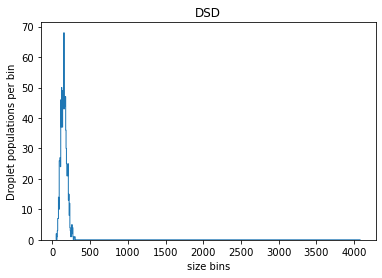

In [17]:
plt.stairs(counts1_ext, bins1_ext*(10**6))
plt.xlabel('size bins')
plt.ylabel('Droplet populations per bin')
plt.title('DSD')
plt.show
#DSD

In [18]:
np.sum(time[0:300])/60#time taken for 300 time steps

0.7296833129931819

In [19]:
np.sum(time[0:600])/60#time taken for 600 time steps

2.277978526577411

In [20]:
np.sum(time[0:900])/60#time taken for 900 time steps

5.02188071736896

In [21]:
np.sum(time[0:990])/60#time taken for 990 time steps

6.616338671822445

In [22]:
unordered_new_V_test1=(np.repeat((bins2_ext[:-1] + bins2_ext[1:])/2., population_int[300,:,0]))
unordered_new_D_test1=(unordered_new_V_test1*6/np.pi)**(1/3)
counts_test1, bins_test1 = np.histogram(unordered_new_D_test1,bins=bins1_ext)

unordered_new_V_test2=(np.repeat((bins2_ext[:-1] + bins2_ext[1:])/2., population_int[600,:,0]))
unordered_new_D_test2=(unordered_new_V_test2*6/np.pi)**(1/3)
counts_test2, bins_test2 = np.histogram(unordered_new_D_test2,bins=bins1_ext)

unordered_new_V_test3=(np.repeat((bins2_ext[:-1] + bins2_ext[1:])/2., population_int[900,:,0]))
unordered_new_D_test3=(unordered_new_V_test3*6/np.pi)**(1/3)
counts_test3, bins_test3 = np.histogram(unordered_new_D_test3,bins=bins1_ext)

unordered_new_V_test4=(np.repeat((bins2_ext[:-1] + bins2_ext[1:])/2., population_int[990,:,0]))
unordered_new_D_test4=(unordered_new_V_test4*6/np.pi)**(1/3)
counts_test4, bins_test4 = np.histogram(unordered_new_D_test4,bins=bins1_ext)


In [23]:
np.sum(unordered_new_V_test1)

2.2623992075195335e-09

In [24]:
np.sum(unordered_new_V_test2)

2.286301602229974e-09

In [25]:
np.sum(unordered_new_V_test3)

2.3102039969404146e-09

In [26]:
np.sum(unordered_new_V_test4)

0.0

(0.0, 1000.0)

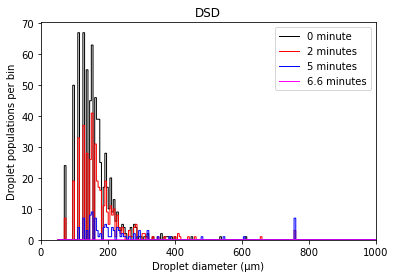

In [28]:
plt.stairs(counts_test1,bins_test1*(10**6),color='black',label='0 minute')
plt.stairs(counts_test2,bins_test2*(10**6),color='red',label='2 minutes')
plt.stairs(counts_test3,bins_test3*(10**6),color='blue',label='5 minutes')
plt.stairs(counts_test4,bins_test4*(10**6),color='magenta',label='6.6 minutes')
plt.xlabel('Droplet diameter (\u03bcm)')
plt.ylabel('Droplet populations per bin')
plt.title('DSD')
plt.legend()
plt.show

plt.xlim(0,1000)

<function matplotlib.pyplot.show(close=None, block=None)>

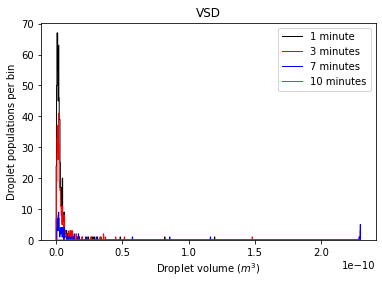

In [29]:
plt.stairs(populations_series[300,:,0], bins2_ext,color='black',label='1 minute')
plt.stairs(populations_series[600,:,0], bins2_ext,color='red',label='3 minutes')
plt.stairs(populations_series[900,:,0], bins2_ext,color='blue',label='7 minutes')
plt.stairs(populations_series[990,:,0], bins2_ext,color='magenta',label='10 minutes')
plt.xlabel('Droplet volume ($m^3$)')
plt.ylabel('Droplet populations per bin')
plt.title('VSD')
plt.legend()
plt.show

#plt.xlim(0,0.6e-10)

In [ ]:
populations_series[800,:]-populations_series[3999,:]